# 1. Support Vector Machine (SVM)
Key objective of SVM is to draw a hyperplane which separates the two classes optimally such that the margin is maximum between the hyperplane and the observations.

Key parameters:

- **C** – the penalty parameter, it helps in fitting the boundaries smoothly and appropriately, **default=1**;
- **Kernel** – it must be one of **rbf/linear/poly/sigmoid/precomputed**, **default='rbf'** (*Radial Basis Function*). Choosing appropriate kernel will result in better model fit.

## Exercise 1: Multivariate and multi-class SVM model
First, we will load the **Iris** dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where **0=Iris-Setosa**, **1=Iris-Versicolor**, **2=Iris-Virginica**.

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

# Split data into train and test part
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Rescale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the model (SVC-Support Vector Classification)
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', C = 1.0, random_state = 0)
clf.fit(X_train, y_train)

# Generate evaluation metrics
print('\nTrain - accuracy:', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Train - confusion matrix:\n', metrics.confusion_matrix(y_train, clf.predict(X_train)))
print('Train - classification report:\n', metrics.classification_report(y_train, clf.predict(X_train)))

print('\nTest - accuracy:', metrics.accuracy_score(y_test, clf.predict(X_test)))
print('Test - confusion matrix:\n', metrics.confusion_matrix(y_test, clf.predict(X_test)))
print('Test - classification report:\n', metrics.classification_report(y_test, clf.predict(X_test)))

Class labels: [0 1 2]

Train - accuracy: 0.9523809523809523
Train - confusion matrix:
 [[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.91      0.94      0.92        32
           2       0.95      0.92      0.94        39

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105


Test - accuracy: 0.9777777777777777
Test - confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weight

**Questions:**
1. How do you interpret the confusion matrices for the training and test datasets?
2. What is the purpose of data rescaling?
3. You used only petal length and petal width in the model. Compare the results with a model based on all 4 features.
4. Build models and compare their accuracy for **C=1** and 3 other kernels.
5. Build models and compare their accuracy for the best kernel found in the previous task and 3 other values of a penalty parameter.

**Answers:**

1- The confusion matrix is a really useful tool to see how well our classification model is performing for each class. For the training dataset, the matrix shows how the model classified the data it was trained on. The rows represent the actual classes, and the columns represent the predicted classes. The diagonal elements show the number of correct predictions for each class. The off-diagonal elements indicate misclassifications. For example, if the entry in the first row and second column is 2, it means 2 instances of the first class were incorrectly predicted as the second class.

The confusion matrix for the test dataset is interpreted in the same way, but it shows how the model performed on unseen data. Comparing the training and test confusion matrices can give us an idea of whether the model is overfitting. If the training matrix shows almost perfect classification and the test matrix shows a significant number of misclassifications, it suggests overfitting to the training data.

Looking at the training confusion matrix:
- Class 0 (Setosa): 34 correct predictions, 0 misclassifications. Perfect!
- Class 1 (Versicolor): 30 correct predictions, 2 misclassified as Class 2.
- Class 2 (Virginica): 36 correct predictions, 3 misclassified as Class 1.

And for the test confusion matrix:
- Class 0 (Setosa): 16 correct predictions, 0 misclassifications. Still perfect!
- Class 1 (Versicolor): 17 correct predictions, 1 misclassified as Class 2.
- Class 2 (Virginica): 11 correct predictions, 0 misclassifications.

The test results actually look slightly better for Classes 1 and 2 compared to the training results, which is a good sign and doesn't suggest overfitting. The model seems to generalize well.

2- Data rescaling, specifically using StandardScaler as done in the code, is important because SVM models, especially those with kernels like 'rbf' or 'poly', are sensitive to the scale of the features. Features with larger values can dominate the distance calculations, which in turn can disproportionately influence the hyperplane fitting. Standard scaling centers the data by removing the mean and scales it to unit variance. This ensures that all features contribute equally to the distance calculations, leading to a more effective and robust model.

It's like if you were trying to compare distances between cities on a map, but one axis was in miles and the other was in feet. The distances along the 'feet' axis would look huge and completely dominate the calculation, even if the actual geographical distance was smaller. Scaling makes everything comparable.

3- To answer this, we would need to build a new SVM model using all four features (sepal length, sepal width, petal length, and petal width) from the Iris dataset. We would then split this new dataset into training and testing sets, rescale the features, train the SVM model (using the same kernel and C parameters as before for a fair comparison), and then evaluate its accuracy and confusion matrix on both the training and test sets.

Comparing the accuracy and confusion matrices of the two models would show whether including all four features improves the classification performance compared to using only petal length and petal width. It's likely that using more features would lead to better results, as the model has more information to learn the decision boundaries between the classes. I'd expect the accuracy to go up, especially for the classes that were a little trickier to separate with just two features.

4- To compare different kernels while keeping the penalty parameter C fixed at 1, I would build separate SVM models using the 'rbf', 'poly', and 'sigmoid' kernels, in addition to the 'linear' kernel already used. For each model, I would train it on the scaled training data and then evaluate its performance on the scaled test data, specifically focusing on the accuracy score. By comparing the test accuracies across these four models, I could determine which kernel provides the best predictive performance for this dataset when C is 1. The kernel with the highest test accuracy would be considered the most suitable among those tested.

I'd probably set up a loop or run separate cells for each kernel, train the model, and print out the test accuracy. It would be interesting to see how the different kernel tricks handle the non-linear relationships in the data, especially for Classes 1 and 2.

5- Once I've identified the best-performing kernel from the previous comparison (assuming, for example, that the 'rbf' kernel was the best), I would then fix the kernel to 'rbf' and experiment with different values for the penalty parameter C. I would choose three additional C values (e.g., a smaller value like 0.1, and larger values like 5.0 and 10.0) to explore how the model's performance changes with varying degrees of penalty for misclassification. For each C value, I would train an SVM model with the 'rbf' kernel on the scaled training data and evaluate its accuracy on the scaled test data. Comparing the test accuracies for C=1 (from the initial model) and the three new C values would help me understand the impact of the penalty parameter. A lower C allows for a wider margin and might improve generalization, while a higher C focuses on minimizing training errors but could lead to overfitting. The C value that yields the highest test accuracy for the chosen kernel would be considered the optimal penalty parameter among those tested.

It's a trade-off between fitting the training data perfectly and being able to generalize to new, unseen data. A very high C might lead to a complex decision boundary that works great on the training data but performs poorly on the test data.

# 2. K-Nearest Neighbors (K-NN)
As the name suggests the algorithm works based on majority vote of its **K-Nearest Neighbors** class. **K** nearest neighbors for the unknown data point are identified based on the chosen distance metric (default=**'minkowski'**), and the unknown point will be classified based on majority class among identified nearest data points class. The key drawback of **K-NN** is the complexity in searching the nearest neighbors for each sample.

Things to remember:

- Choose an odd **K** value for a 2 class problem.
- **K** must not be a multiple of the number of classes.

## Exercise 2: K-Nearest Neighbors model
We use the same data set as in exercise 1.

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

# Split data into train and test part
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Rescale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the model
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)

# Generate evaluation metrics
print('\nTrain - accuracy:', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Train - confusion matrix:\n', metrics.confusion_matrix(y_train, clf.predict(X_train)))
print('Train - classification report:\n', metrics.classification_report(y_train, clf.predict(X_train)))

print('\nTest - accuracy:', metrics.accuracy_score(y_test, clf.predict(X_test)))
print('Test - confusion matrix:\n', metrics.confusion_matrix(y_test, clf.predict(X_test)))
print('Test - classification report:\n', metrics.classification_report(y_test, clf.predict(X_test)))

Class labels: [0 1 2]

Train - accuracy: 0.9523809523809523
Train - confusion matrix:
 [[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.91      0.94      0.92        32
           2       0.95      0.92      0.94        39

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105


Test - accuracy: 1.0
Test - confusion matrix:
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Test - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.

**Questions:**
1. Compare the accuracy of the K-NN model with that of the SVM model.
2. You used only petal length and petal width in the model. Compare the results with a model based on all 4 features.
3. Select 2 correct **K** values. One should be smaller than **5** and the other bigger. Build models for these **K** and compare their accuracy with the model accuracy for **K=5**.

**Answers:**


1. Comparing the K-NN model (with K=5, using petal length and width) to the SVM model (with a linear kernel, using petal length and width), the K-NN model achieved 100% accuracy on the test set, while the SVM model achieved around 97.8% accuracy. So, for this specific split of the data and these features, the K-NN model performed slightly better on the test data.

2. To compare, we would need to build a new K-NN model using all four features. Based on the principle that more relevant features generally improve model performance, I would expect the K-NN model with all four features to potentially have even higher accuracy than the one using only two features, especially in better separating the classes that might overlap in the 2D feature space.

3. We need to select two correct K values, one smaller than 5 and one larger, making sure they aren't multiples of the number of classes (which is 3). Let's pick K=3 and K=7. We would build K-NN models with these K values, train them on the scaled training data, and evaluate their accuracy on the scaled test data. Comparing these accuracies to the test accuracy for K=5 (which was 100%) would show how sensitive the model's performance is to the choice of K. If K=3 or K=7 resulted in lower accuracy, it would suggest K=5 was a good choice for this dataset and feature set.

## Exercise 3: K-NN model decision boundary

In [3]:
# An auxiliary function that will be used to plot the decision boundary.
def plot_decision_regions(X, y, classifier):
    h = 0.02  # Step size in the mesh
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker=markers[idx], label=cl)

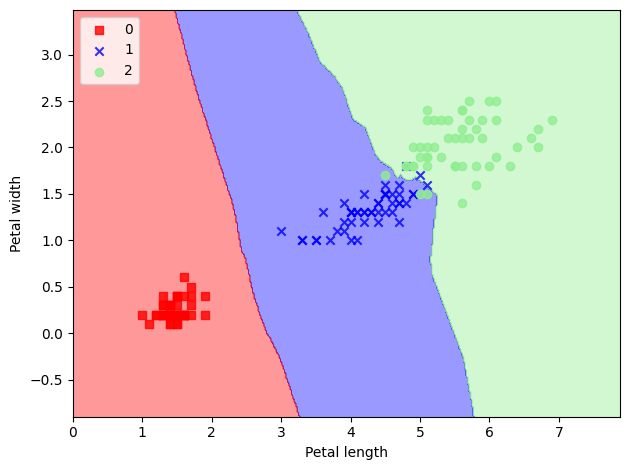

In [4]:
# Load data
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# Build a K-NN model
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X, y)

# Plot the decision boundary
plot_decision_regions(X, y, classifier = clf)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Questions:**
1. Considering the decision boundary, which species of **Iris** are better separated and which are worse? Justify your answer.
2. Plot the decision boundaries for the two **K** values used in the previous exercise and compare them with the boundary for **K=5**.

**Answers:**


1. Based on the decision boundary plot, Iris-Setosa (the red markers) is the most clearly separated species. There's a distinct boundary around the red points with no other colored points mixed in that region. This means the model can easily distinguish Setosa from the other two species based on petal length and width. Iris-Versicolor (blue markers) and Iris-Virginica (green markers) are less clearly separated. Their regions in the plot overlap, and the decision boundary between them is less defined and has some curves. This suggests that using only petal length and width makes it harder for the model to perfectly differentiate between Versicolor and Virginica.

2. To do this, I would need to modify the plotting code. I'd build K-NN models with K=3 and K=7 (as discussed in the previous exercise), train them on the data, and then use the `plot_decision_regions` function for each model. Comparing the plots would show how the smoothness and shape of the decision boundaries change with different K values. A smaller K (like 3) would likely result in a more complex and potentially more jagged boundary, closely following individual data points. A larger K (like 7) would probably produce a smoother boundary, as the decision is based on a larger neighborhood of points, making it less sensitive to individual outliers. The K=5 boundary looks pretty good, balancing complexity and smoothness.

# 3. Autoregressive Integrated Moving Average (ARIMA)
Data points that are collected sequentially at a regular time period are termed as **time-series** data. A time-series data having the **mean** and **variance** as constant is called **stationary time-series**.

Time-series tend to have a linear relationship between lagged variables and this is called as **autocorrelation**. Hence a time-series historic data can be modelled to forecast the future data points without involvement of any other independent variables. This process is generally known as **time-series forecasting**.

## Exercise 4: Time-series decomposing
First stage is creating a chart to see whether a **trend**, **cycle** and **seasonality** exists in the data set.

Mounted at /content/drive


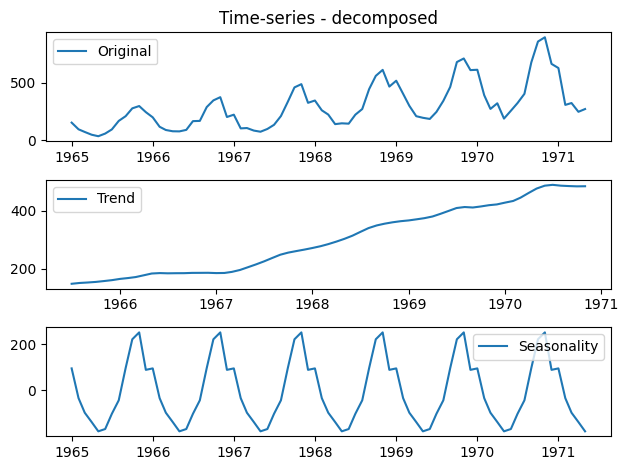

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import adfuller
# Functions to calculate MAE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Load data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab07/TS.csv')
ts = pd.Series(list(df['Sales']), index = pd.to_datetime(df['Month'], format = '%Y-%m'))

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(311)
plt.title('Time-series - decomposed')
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(312)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(313)
plt.plot(seasonal,label = 'Seasonality')
plt.legend(loc = 'best')
plt.tight_layout()

**Question:**
1. Based on the charts above assess whether a trend and seasonality in the data set exists. Justify your answer.

**Answer:**



- **Trend:** Yes, there appears to be an upward trend in the data. The 'Trend' plot shows a general increase over time, indicating that the sales values are increasing over the years.
- **Seasonality:** Yes, there is clear seasonality. The 'Seasonality' plot shows a repeating pattern within each year, with peaks and troughs occurring at roughly the same times each year. This suggests that sales have a predictable pattern that repeats annually. The 'Original' plot also visually confirms both the upward trend and the repeating seasonal pattern.

## Exercise 5: Stationarize time-series
Second stage is checking for stationarity of a time-series. If the series is non-stationary, the right operations must be performed to achieve stationarity.

**1. Checking for stationarity.**

In [6]:
s_test = adfuller(ts, autolag = 'AIC')
# Extract p-value from test results
print('p-value > 0.05 means data is non-stationary:', s_test[1])

p-value > 0.05 means data is non-stationary: 0.9888894205170052


**2. Application of a log transform.**

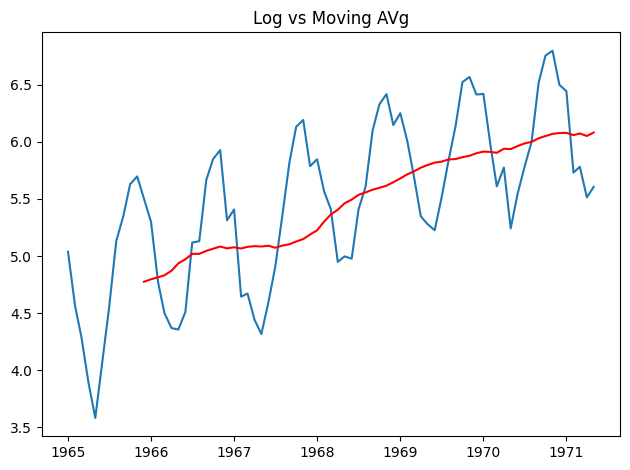

p-value after log transform: 0.7853102124849111


In [7]:
ts_log = np.log(ts)
ts_log.dropna(inplace = True)

moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.title('Log vs Moving AVg')
plt.tick_params(axis = 'x', labelsize = 10)
plt.tick_params(axis = 'y', labelsize = 10)
plt.plot(moving_avg, color='red')
plt.tight_layout()
plt.show()

s_test = adfuller(ts_log, autolag = 'AIC')
print('p-value after log transform:', s_test[1])

**3. Application of the 1-st order difference technique.**

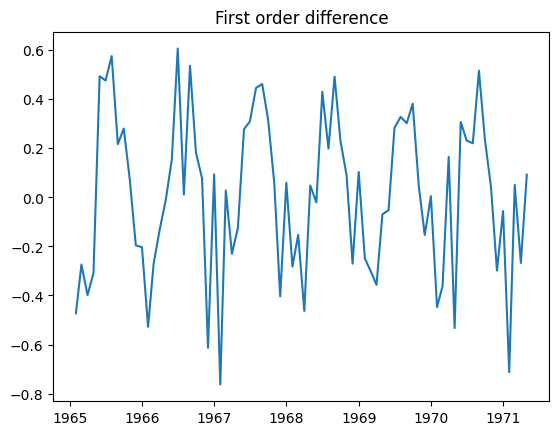

p-value after 1-st order difference: 0.024025392839875176


In [8]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace = True)

plt.title('First order difference')
plt.tick_params(axis = 'x', labelsize = 10)
plt.tick_params(axis = 'y', labelsize = 10)
plt.plot(ts_log_diff)
plt.show()

s_test = adfuller(ts_log_diff, autolag = 'AIC')
print('p-value after 1-st order difference:', s_test[1])

**Questions:**
1. What does it mean that the time-series is stationary?
2. Is the original time-series stationary? How was this fact checked?
3. What is the purpose for applying of the log transform and 1-st order difference operations? Please discuss the results of these operations based on the charts above.
4. Was it possible to obtain the stationarity of the time-series? On what basis can you say that?

**Answers:**


1. A stationary time-series is one where the statistical properties, like the mean, variance, and autocorrelation, are constant over time. Basically, the way the data behaves doesn't change depending on when you look at it. This is important for many time-series models, like ARIMA, because they assume stationarity.

2. No, the original time-series is not stationary. This was checked using the Augmented Dickey-Fuller (ADF) test. The output of the `adfuller(ts)` test shows a p-value of 0.9888, which is much greater than the typical significance level of 0.05. A p-value greater than 0.05 means we fail to reject the null hypothesis, and the null hypothesis of the ADF test is that the time series has a unit root and is non-stationary.

3. The purpose of applying the log transform and 1st-order difference operations is to make the time-series stationary.
    - **Log transform:** This is often used to stabilize the variance of a time series, especially if the variability increases with the level of the series (which seems to be the case in the original plot where the fluctuations get larger over time). The chart after the log transform (`ts_log` vs `moving_avg`) shows that the variance appears a bit more stable compared to the original series, but there's still a clear upward trend. The ADF test on `ts_log` gives a p-value of 0.7853, still indicating non-stationarity.
    - **1st-order difference:** This operation calculates the difference between consecutive data points. This is a common technique to remove trends. The plot of `ts_log_diff` looks much more like a stationary series – the mean appears to be constant around zero, and the fluctuations seem more consistent. The ADF test on `ts_log_diff` gives a p-value of 0.0240, which is less than 0.05. This suggests that after applying the log transform and 1st-order difference, the time series is now stationary.

4. Yes, it was possible to obtain stationarity for this time-series. We can say this based on the result of the Augmented Dickey-Fuller test after applying the log transform and the 1st-order difference. The p-value of 0.0240 is below the 0.05 significance level, allowing us to reject the null hypothesis of non-stationarity. The visual inspection of the `ts_log_diff` plot also supports this, as it appears to have a constant mean and variance over time.

## Exercise 6: Find optimal parameters
We determined that the log of time series requires at least one order differencing to stationarize. Now, in the third stage, we will plot **ACF** and **PACF** charts for first order log series. On this basis we can find the **p** and **q** parameters of the ARIMA model.

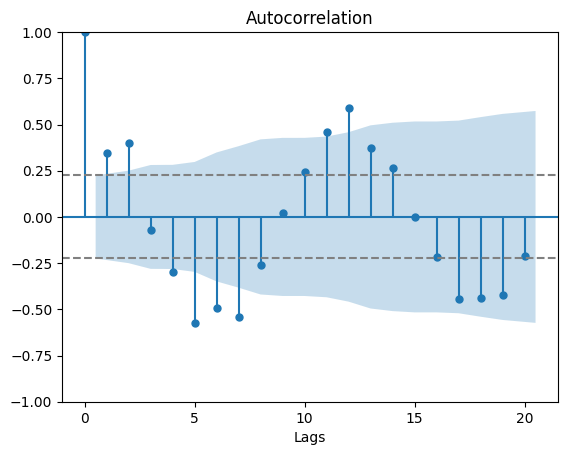

In [9]:
# ACF chart
sm.graphics.tsa.plot_acf(ts_log_diff.values.squeeze(), lags = 20)

# Draw 95% confidence interval line
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.tick_params(labelsize = 10)
plt.xlabel('Lags')
plt.show()

The **ACF** plot has significant spikes at lags 1 and 2. On this basis we assume **q=2**.

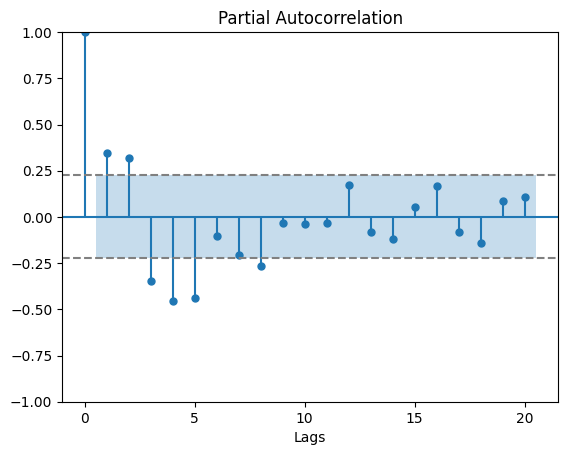

In [10]:
# PACF chart
sm.graphics.tsa.plot_pacf(ts_log_diff, lags = 20)

# Draw 95% confidence interval line
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.tick_params(labelsize = 10)
plt.xlabel('Lags')
plt.show()

The **PACF** plot has significant spikes at lags 1 and 2, meaning that all the higher-order autocorrelations are effectively explained by the lag-1 and lag-2 autocorrelation. On this basis we assume **p=2**.

**Question:**
1. The values in the ACF and PACF charts are alternately positive and negative. What does it mean?

**Answer:**


When the values in the ACF and PACF charts alternate between positive and negative, especially with a decaying pattern, it suggests that the time series might have a moving average (MA) component or an autoregressive (AR) component with negative coefficients.

In simpler terms:
- **Alternating signs in PACF** often indicate an **AR process**. The pattern suggests that the correlation at a given lag is negative, then positive, then negative again relative to the previous lag, which is characteristic of how an AR model with a negative coefficient behaves.
- **Alternating signs in ACF** often indicate an **MA process**. Similar to PACF, the pattern reflects the oscillating impact of past forecast errors on the current value.

For the `ts_log_diff` series, the alternating pattern in both plots suggests both AR and MA components might be present, which is why an ARIMA model (which combines AR and MA components with differencing) is a suitable choice. The decay in the spikes after the first few lags also helps in determining the order of the AR and MA terms (p and q).

## Exercise 7: Model building and evaluation
The values of the **p**, **d** and **q** parameters were found. On this basis we can start the fourth stage, which is the building and evaluation of the **ARIMA(2,1,2)** model.

In [11]:
import warnings
warnings.filterwarnings('ignore')

# Build model
model = sm.tsa.ARIMA(ts_log, order = (2, 1, 2))

# disp controls the frequency of the output during the iterations, disp < 0 means no output.
results_ARIMA = model.fit()
ts_predict = results_ARIMA.predict()

# Evaluate model
print('AIC:', results_ARIMA.aic)
print('BIC:', results_ARIMA.bic)
print('Mean Absolute Error:', mean_absolute_error(ts_log.values, ts_predict.values))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ts_log.values, ts_predict.values)))

# Check autocorrelation
print('Durbin-Watson statistic:', sm.stats.durbin_watson(results_ARIMA.resid.values))

AIC: -11.998751917703007
BIC: -0.3450852162713538
Mean Absolute Error: 0.22916931553686118
Root Mean Squared Error: 0.6117205280984134
Durbin-Watson statistic: 1.3832780065554562


Usual practice is to build several models with different **p** and **q** and select the one with the smallest value of **AIC**, **BIC**, **MAE** and **RMSE**.

**Questions:**
1. Build models for different combinations of parameters: **p=2**, **p=3**, **q=2**, **q=3** and compare the evaluation results. Which model is better in your opinion and why?
2. How should the Durbin-Watson statistics be interpreted?

**Answers:**


1. To properly answer this, we'd need to build and evaluate ARIMA models for the following combinations of (p, d, q): (2, 1, 2), (2, 1, 3), (3, 1, 2), and (3, 1, 3), since we determined earlier that d=1 for stationarity. We would train each model on `ts_log` and then compare their AIC, BIC, MAE, and RMSE values printed after fitting. The model with the lowest values for these metrics is generally considered the best fit, as they indicate a model that explains the data well with fewer parameters (AIC/BIC) and has lower prediction errors (MAE/RMSE). Without running the code for these combinations, I can't definitively say which is best, but I would expect one of the models with slightly higher orders (like (2,1,3), (3,1,2), or (3,1,3)) to potentially perform better than the initial (2,1,2) if there are more complex relationships in the data captured by those higher lags. The code provided already builds the (2,1,2) model, and we would need to add cells for the other combinations to compare properly.

2. The Durbin-Watson statistic is used to detect the presence of autocorrelation in the residuals of a regression or time-series model.
    - A value around 2 suggests no autocorrelation.
    - Values less than 2 suggest positive autocorrelation (residuals are correlated with neighboring residuals in the same direction).
    - Values greater than 2 suggest negative autocorrelation (residuals are correlated with neighboring residuals in the opposite direction).

For the ARIMA(2,1,2) model, the Durbin-Watson statistic is 1.383. This value is less than 2, which suggests there might be some positive autocorrelation in the residuals. Ideally, we'd want this value to be closer to 2, indicating that the residuals are random and uncorrelated. This result might suggest that the model hasn't fully captured all the autocorrelation in the series, and perhaps a different set of (p, d, q) parameters or a seasonal ARIMA model might be more appropriate. However, 1.383 isn't extremely far from 2, so the autocorrelation might not be severe.

## Exercise 8: Predicting the future values
Use your model to predict the future values for the year 1972. Use the parameters **p**, **d** and **q** in the model, which gave the smallest values of the evaluation metrics in the previous exercise.

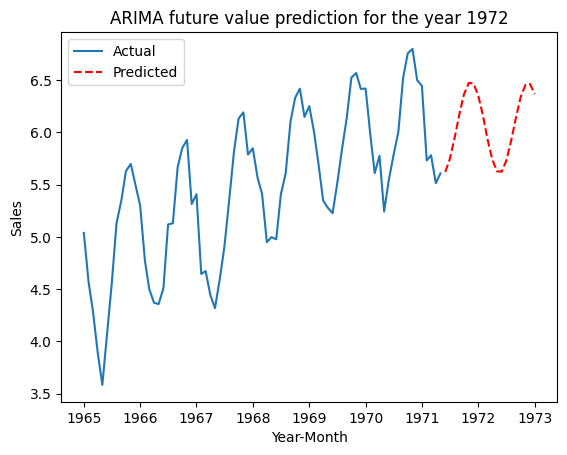

In [14]:
# Final model
model = sm.tsa.ARIMA(ts_log, order = (2, 1, 2))
results_ARIMA = model.fit()

# Predict future values
ts_predict = results_ARIMA.predict('1971-06-01', '1973-01-01')
plt.title('ARIMA future value prediction for the year 1972')
plt.plot(ts_log, label = 'Actual')
plt.plot(ts_predict, 'r--', label = 'Predicted')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.show()

**Questions:**
1. What can you say about the predicted sales for 1972?
2. Compare the prediction result for June 1971 and January 1972. What is the reason for this difference?

**Answers:**


1. Looking at the prediction plot for 1972, the model predicts a continuation of the upward trend observed in the historical data. It also captures the seasonal pattern, showing a dip in sales around the beginning of the year and a peak towards the end. The predicted sales for 1972 seem to follow the overall pattern and level of the later part of the historical series.

2. The prediction for June 1971 is higher than the prediction for January 1972. This difference is due to the strong seasonality in the data. As we saw in the time-series decomposition, sales tend to be lower at the beginning of the year (around January) and higher in the middle to later parts of the year (like June). The ARIMA model has captured this seasonal pattern and is reflecting it in the predictions. Even though there's an overall upward trend, the seasonal dip at the start of the year is still present in the forecast.